# Langkah 1 - Ilustrasi Data Non-Linier

## Langkah 1a - Import Library

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

## Langkah 1b - Buat Kembali Fungsi Plotting

In [2]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Langkah 1c - Buat Data Dummy Non-Linier

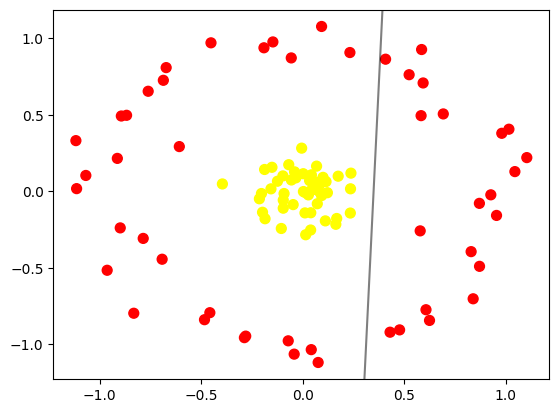

In [3]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [5]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    r = np.exp(-(X ** 2).sum(1)) # Calculate r as a radial basis function transformation
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 3.34948598e-02,  7.04922643e-02],
       [-1.47474001e-01,  9.76541931e-01],
       [ 1.66939200e-01, -1.76869984e-01],
       [-1.88306435e-01,  1.43270680e-01],
       [ 9.17901304e-02, -2.00633660e-02],
       [-1.91448598e-01,  9.38273592e-01],
       [ 5.92649928e-01,  7.08513310e-01],
       [ 6.78175028e-02,  1.65179861e-01],
       [ 5.23725906e-01,  7.62395849e-01],
       [ 5.82632919e-01,  4.94962841e-01],
       [-2.03818237e-01, -1.37291558e-02],
       [ 1.74207373e-01,  9.94600995e-02],
       [-6.87075814e-01,  7.25943990e-01],
       [-9.63432745e-02, -5.66167117e-02],
       [-4.25166780e-02, -1.06301378e+00],
       [-1.24861330e-01,  6.65395214e-02],
       [-9.63804512e-01, -5.15079577e-01],
       [ 9.80160232e-01,  3.79714408e-01],
       [ 7.55218709e-02, -1.11745563e+00],
       [ 4.29789391e-01, -9.19650865e-01],
       [ 5.59413174e-02,  1.31514418e-02],
       [ 2.94455073e-03, -8.44374175e-04],
       [ 9.26192623e-01, -2.22103955e-02],
       [-4.52400456e-01,  9.70715305e-01],
       [ 1.04470738e+00,  1.29429223e-01],
       [ 8.40450376e-02,  4.72276461e-02],
       [-5.69136809e-02,  8.72072588e-01],
       [-1.52050510e-01,  1.57693431e-01],
       [-9.13699632e-01,  2.15737685e-01],
       [-2.87746865e-01, -9.55289831e-01],
       [ 8.69857463e-01, -7.79664004e-02],
       [-4.06159740e-02,  1.27813482e-01],
       [-8.68186692e-01,  4.97277286e-01],
       [ 5.85197265e-01,  9.26927499e-01],
       [-3.96218447e-01,  4.88637250e-02],
       [-1.05970607e-01, -2.42099949e-01],
       [-6.73185077e-01,  8.08769305e-01],
       [ 2.74219112e-02, -2.27349444e-02],
       [ 7.12748296e-02, -8.04303662e-02],
       [-3.41785424e-02,  8.86576135e-02],
       [-8.32697162e-01, -7.95821990e-01],
       [-9.64572691e-02, -1.09594566e-01],
       [ 9.28181634e-02, -2.69803684e-02],
       [-1.86072307e-01, -1.78436984e-01],
       [ 1.14256857e-01,  6.41417377e-02],
       [ 1.21060978e-01, -8.42850246e-03],
       [ 2.31954283e-01,  9.07222747e-01],
       [-4.84324589e-01, -8.37965829e-01],
       [-6.92910608e-02,  1.74528771e-01],
       [ 3.85046077e-02, -2.52107396e-01],
       [ 1.11013122e-01, -1.92477685e-01],
       [ 8.29132901e-01, -3.93395229e-01],
       [ 8.03463719e-02, -1.50696558e-04],
       [-9.81686092e-02,  1.01223659e-01],
       [-1.56935246e-01,  1.67861167e-02],
       [-9.24366720e-02, -1.37427229e-02],
       [ 4.07720366e-01,  8.63739478e-01],
       [ 8.91661582e-02,  6.48043536e-02],
       [ 2.33984137e-01, -1.41288156e-01],
       [ 9.95617682e-02,  9.18604073e-02],
       [-5.70184909e-03,  2.82648178e-01],
       [-5.63137409e-02,  7.47604751e-02],
       [ 1.01527698e+00,  4.06393671e-01],
       [ 3.92244324e-02, -1.39371679e-01],
       [ 4.21558902e-02,  1.08328455e-01],
       [ 2.35020252e-01,  1.70717732e-02],
       [-4.58007192e-01, -7.92212545e-01],
       [ 1.06614257e-02, -1.40312181e-01],
       [-8.94044021e-01,  4.92624006e-01],
       [-4.76111996e-02, -8.62041717e-02],
       [ 9.24577053e-02,  1.07749127e+00],
       [ 9.54288578e-01, -1.56853087e-01],
       [-7.61784680e-01,  6.54282967e-01],
       [ 8.70536529e-01, -4.89389576e-01],
       [-1.11788346e+00,  3.31780868e-01],
       [-8.99433174e-01, -2.38229822e-01],
       [-6.93052079e-01, -4.42973782e-01],
       [ 4.15671541e-02, -1.03362289e+00],
       [ 1.12331357e-02, -6.73573742e-03],
       [ 6.24142066e-01, -8.42750192e-01],
       [ 2.37098253e-01,  1.19367763e-01],
       [-1.06891545e+00,  1.04266336e-01],
       [-7.19190213e-02, -9.76017646e-01],
       [ 6.06800516e-01, -7.72865550e-01],
       [ 5.78192724e-01, -2.57731288e-01],
       [ 1.10340724e+00,  2.20890410e-01],
       [ 1.42049680e-02, -2.83110975e-01],
       [ 8.39135087e-01, -7.01409515e-01],
       [ 2.02956961e-03,  1.15646600e-01],
       [-2.13915584e-01, -4.80709689e-02],
       [-1.11437502e+00,  1.81799552e-02],
       [ 6.91929197e-01,  5.06207409e-01

# Langkah 2 - Fitting Model

In [6]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

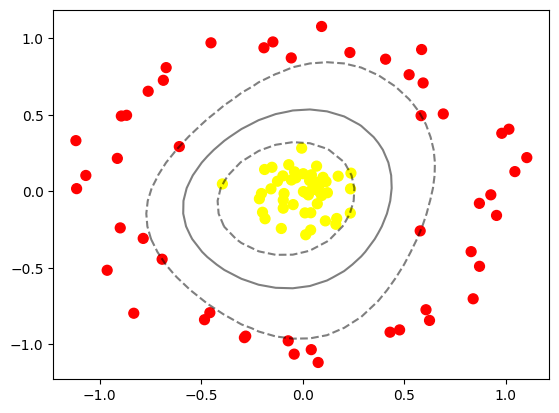

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')